# Análise do conjunto de dados relativos à amostras de Chá. Dados coletados por infravermelho próximo (NIR)

#### 100 amostras diferentes; 20 amostras de chás argentino verde (1); 20 amostras de chás argentinos pretos (2); 20 amostras de chás brasileiros verdes(3); 20 amostras de chás brasileiros pretos (4); 20 amostras de chás asiáticos (5)

In [2]:
# Importando bibliotecas 
import matplotlib.pyplot as plt # Gráficos
import pandas as pd # Biblioteca para tratar de conjunto de dados 
import scipy.io # Aqui eu utilizarei para pré-processamentos
import numpy as np # Manipulação de vetores e matrizes

In [3]:
# LENDO O ARQUIVO .MAT 
caminho = r'C:\Users\felip\OneDrive - Universidade Federal de Pernambuco\Quimiometria\Quimiometria 2\Dados\2 - Análise exploratória\Chás\exemplo_1.mat'
dados_cha = scipy.io.loadmat(caminho) # Aqu

In [4]:
# Dando uma olhada nos dados importados
print(dados_cha) # Imprime alguma coisa na tela, neste caso os dados importados

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jul 14 11:45:20 2017', '__version__': '1.0', '__globals__': [], 'X': array([[0.68985403, 0.68917978, 0.68822098, ..., 0.37192628, 0.37142485,
        0.37276542],
       [0.6667816 , 0.66439497, 0.66687387, ..., 0.35356709, 0.35308215,
        0.35196894],
       [0.8253243 , 0.82898581, 0.83001113, ..., 0.29250306, 0.29340404,
        0.29351828],
       ...,
       [0.79230088, 0.7914058 , 0.79556966, ..., 0.39043197, 0.39050263,
        0.39127272],
       [0.77476913, 0.77190864, 0.77283221, ..., 0.39220747, 0.3926698 ,
        0.39412576],
       [0.84198248, 0.8452341 , 0.84102517, ..., 0.43143168, 0.43117025,
        0.43243557]]), 'xaxis': array([[1001, 1002, 1003, ..., 2498, 2499, 2500]], dtype=uint16), 'Class': array([[1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
    

In [5]:
# Importamos um arquivo do tipo DICIONÁRIO, onde temos 'X' que são os dados espectrais, 
#'xaxis' que é um vetor (array) com os comprimentos de onda e 
#'Class' que é um vetor contendo as classes de cada amostra.

# Vamos criar um conjunto de dados (DataFrame) com os dados contidos em 'X'

df_cha = pd.DataFrame(dados_cha['X'])

In [6]:
# Conferindo se o Dataframe foi criado corretamente 
df_cha.head(1) # Head mostra uma espécie de cabeçalho, por padrão, retorna 5 linhas, porém especifiquei que queria apenas uma.

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.689854,0.68918,0.688221,0.688136,0.688371,0.686261,0.684238,0.686393,0.689834,0.690153,...,0.373342,0.371954,0.371286,0.37168,0.371507,0.370687,0.371296,0.371926,0.371425,0.372765


In [7]:
# Corrigindo os labels
df_cha = df_cha.set_axis(list(range(1001, 2501)), axis=1, inplace=False) # Modifiquei o DF para ficar com os comprimentos de onda certinhos
df_cha.head(1) 

,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.689854,0.68918,0.688221,0.688136,0.688371,0.686261,0.684238,0.686393,0.689834,0.690153,...,0.373342,0.371954,0.371286,0.37168,0.371507,0.370687,0.371296,0.371926,0.371425,0.372765


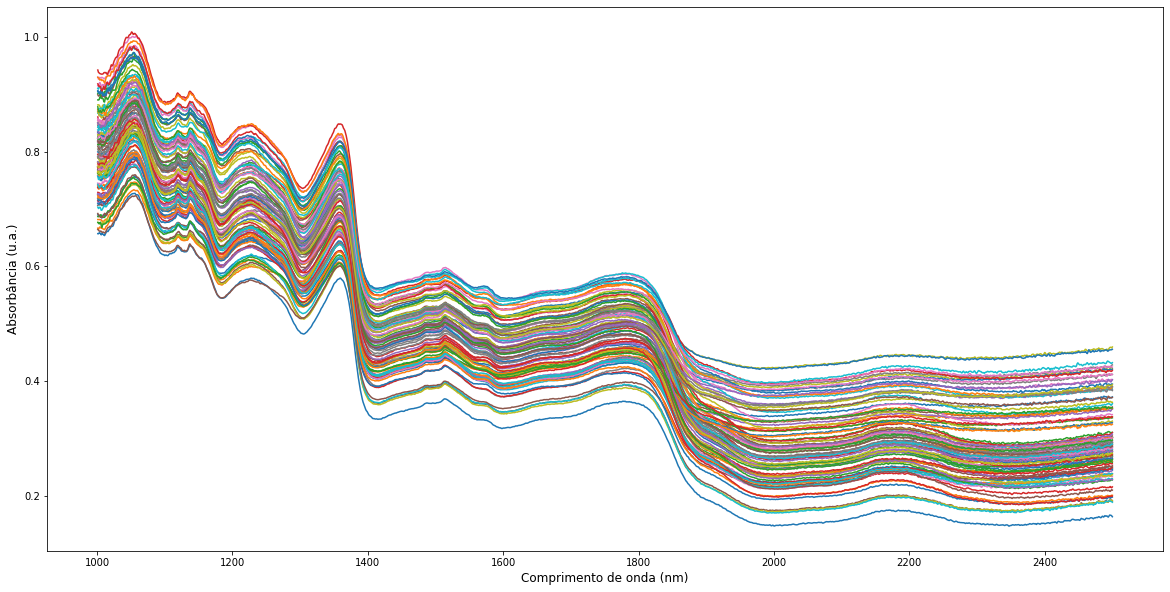

In [8]:
# Dando uma olhada nos espectros brutos 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_cha.T) # Plotar um gráfico de linhas com os dados especificados entre parênteses e transpostos. 
ax.set_xlabel('Comprimento de onda (nm)', fontsize=12)
ax.set_ylabel('Absorbância (u.a.)', fontsize=12)
plt.show()

In [9]:
# Percebe-se uma variação de linha de base e espalhamento, tentativa de correção com 1ª Derivada
from scipy.signal import savgol_filter # Função para derivação ou alisamento com filtro de Savitzky-Golay 
df_dx = savgol_filter(df_cha, 75, 2, deriv=1) # Criei uma nova variável com os dados filtrados, aqui escolhi os dados que eu queria alisar, a janela, o grau do polinômio e a derivaida

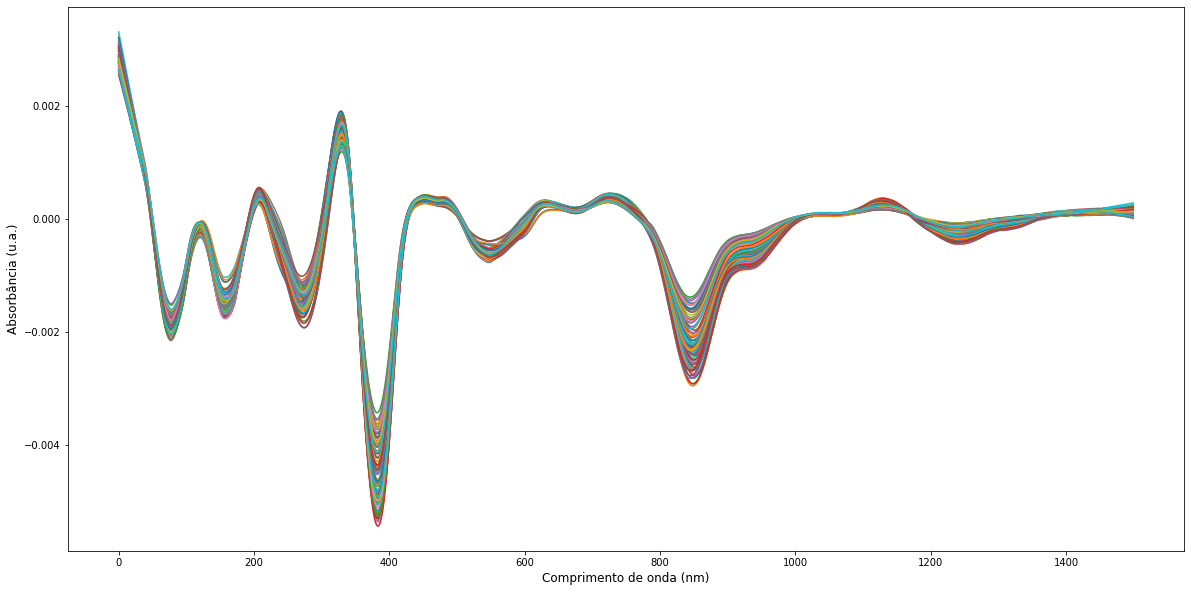

In [10]:
# Espectro derivado
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_dx.T)
ax.set_xlabel('Comprimento de onda (nm)', fontsize=12)
ax.set_ylabel('Absorbância (u.a.)', fontsize=12)
plt.show()

In [11]:
# Importando pré-processamento para centrar na média e a PCA
from sklearn.preprocessing import scale # Função para Centrar na média
from sklearn.decomposition import PCA # Função PCA

In [12]:
# Centrando os dados na média
df_dx_center = scale(df_dx, with_std=False) #with_std = False, pois não quero que ele traga para variância unitária. 
df_dx_center = df_dx_center.set_axis(list(range(1001, 2501)), axis=1, inplace=False) 

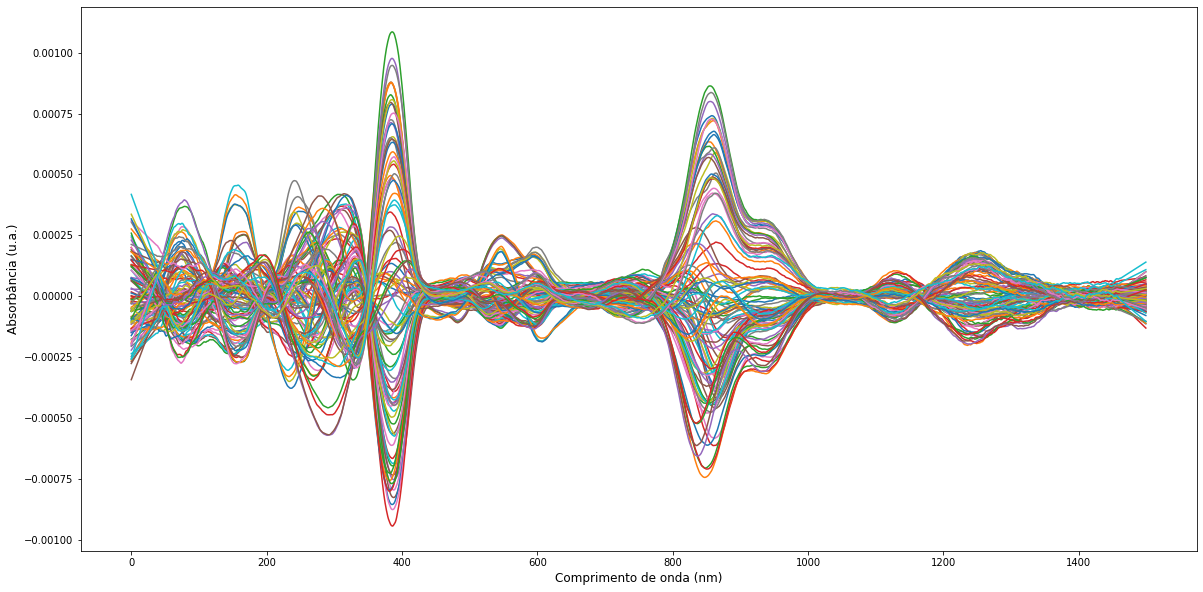

In [13]:
# Plotando o gráfico com os dados centrados na média
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_dx_center.T)
ax.set_xlabel('Comprimento de onda (nm)', fontsize=12)
ax.set_ylabel('Absorbância (u.a.)', fontsize=12)
plt.show()

In [15]:
# Realizando a PCA
pca = PCA(n_components=4) # Calcular no máximo 6 componentes
pca_model = pca.fit(df_dx_center)
PCA_chas = pd.DataFrame(pca_model.transform(df_dx_center), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [16]:
PCA_chas # Só quis conferir como ficaram os dados

,PCA1,PCA2,PCA3,PCA4
0,0.008927,-0.001088,0.000584,0.000521
1,0.008870,-0.000962,0.000543,0.000865
2,-0.004426,-0.004441,-0.001024,0.000404
3,-0.004232,-0.003766,-0.001260,0.000130
4,0.004502,0.000252,0.000207,-0.000155
...,...,...,...,...
95,-0.003270,0.006173,-0.000549,0.000440
96,0.005227,0.000773,0.000762,0.001149
97,0.004852,0.001020,0.000306,0.000483
98,0.005574,0.000223,0.000399,0.000587


In [17]:
pca_var = pca_model.explained_variance_ratio_ # Percentual de variância explicada
pca_var

array([0.76132617, 0.13891725, 0.04339278, 0.01878151])

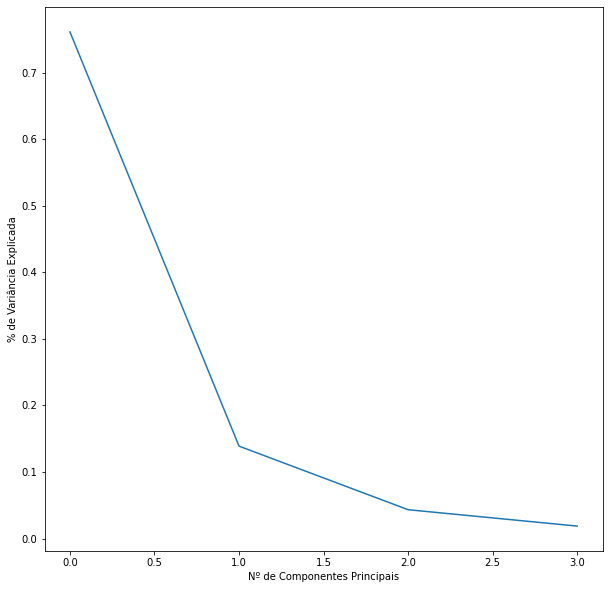

In [18]:
# Explorando os gráficos de variância, Variância explicada e acumulada
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(pca_var)
ax.set_xlabel('Nº de Componentes Principais')
ax.set_ylabel('% de Variância Explicada')
plt.show()

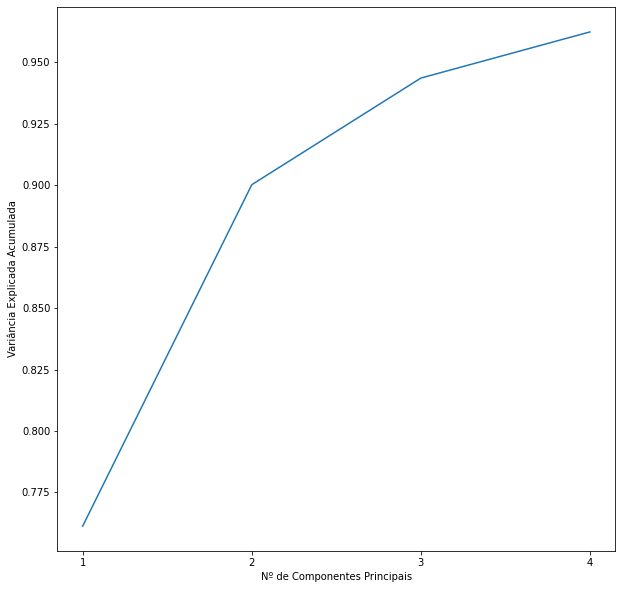

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(list(range(1,5)), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(list(range(1,5)))
plt.xlabel('Nº de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.show()

In [20]:
PCA_chas['Tipo'] = dados_cha['Class'] # Aqui eu adicionei as classes ao conjunto de dados espectrais
# Poderia ser adicionado antes também, mas achei mais fácil trabalhar desse modo

In [64]:
# Atribuindo variáveis aos autovalores e autovetores
autovetores = pca.components_
autovalores = pca.explained_variance_
autovetores.shape

(4, 1500)

In [47]:
# Atribuindo variáveis para Scores e Loadings PC1 x PC2

PC1PC2_scores = PCA_chas.iloc[:, 0:2]
PC1PC2_loadings = autovetores[0:2, :]

(2, 1500)

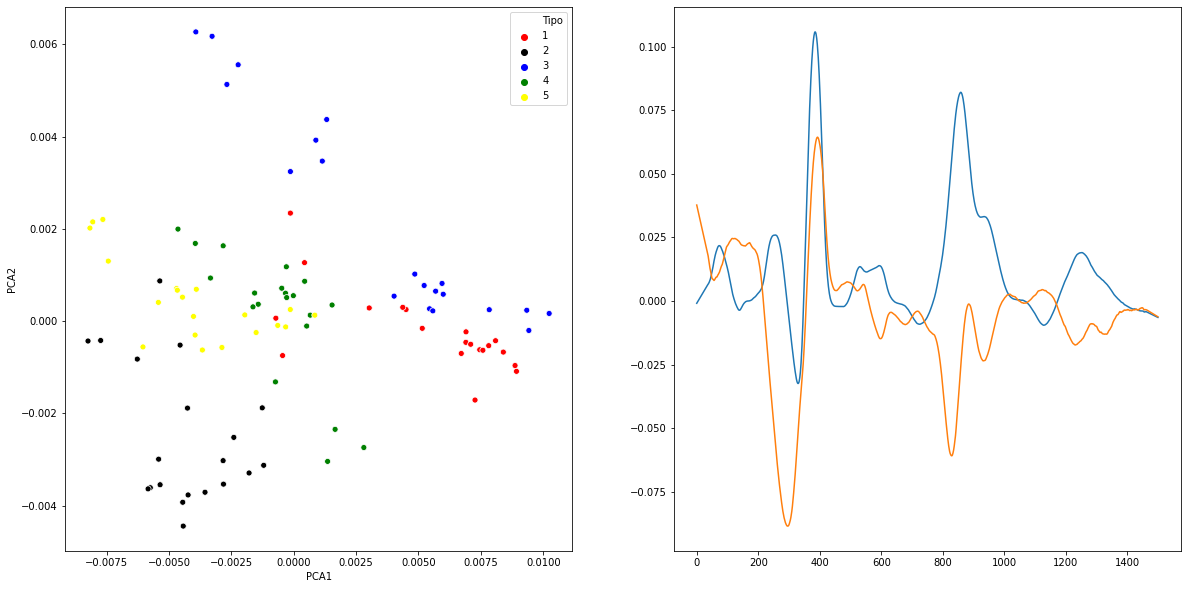

<Figure size 720x720 with 0 Axes>

In [69]:
# SCORES e LOADINGS PC1 x PC2
import seaborn as sns # Importando outra biblioteca para gerar gráficos
fig, ax = plt.subplots(1, 2, figsize=(20,10))
colors = {1:'red', 2:'black', 3:'blue', 4:'green', 5:'yellow'} # Criei um dicionário com cores para cada classe 
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PCA1', y='PCA2', data=PCA_chas, hue='Tipo', palette=colors, ax=ax[0]) # Scores, PC1 x PC2 a ser plotado na esquerda
ax[1].plot(PC1PC2_loadings.T) # Loadings plotados na direita
plt.show()

Algumas coisas podem ser mais simples de serem feitas no programa SPYDER pois temos como observar como estão as variáveis criadas, figuras, dataframes em um modelo parecido com o MATLAB. Resolvi fazer aqui pra ficar melhor a observação do passo-a-paso.

Preciso melhorar várias questões e adicionar a interpretação de resíduos da PCA. 